# Библиотеки

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

In [16]:
# run this function if you need to generate a csv data set from scratch
#data_loader.generate_csv_dataset()

In [17]:
# X, y, ID = data_loader.load_dataset()
X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv', 
                                    y_path='data/y_labels_4096.csv',
                                    ID_path='data/IDs_4096.csv')

data loaded in 0.027338504791259766ms
          0         1         2         3         4         5         6  \
0  0.319181 -0.522682 -0.597526 -1.407693 -0.610477 -0.186076 -1.417255   
1 -0.502729 -0.332831  0.096766 -0.967017 -0.040431 -0.160043 -0.824728   
2 -0.906320  0.618802 -0.169045 -0.580832 -0.001135  1.000693 -0.013734   
3  0.897421 -1.357681 -0.065064 -1.938891 -0.333115 -0.361470 -1.352050   
4  0.493191 -1.505473 -0.693307 -1.629228 -0.459147 -0.437445 -1.302624   

          7         8         9  ...        70        71        72        73  \
0 -1.072452 -1.731274  0.549044  ...  0.161543  1.713000  0.981261  0.210663   
1 -0.501110 -0.918544  0.271237  ...  2.114454  1.614392  0.273066  0.401989   
2 -0.397151 -0.764400  0.588600  ...  1.191591  2.097101  2.183672  2.050057   
3 -0.770320 -1.951237 -0.027059  ... -0.269909 -0.522271  0.391216  0.328256   
4 -0.237175 -1.215223  0.284750  ... -0.938816  0.149529 -0.120720 -0.135068   

         74        75        7

In [18]:
ID['0'].unique()    # actors

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [19]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


In [6]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-2, 1, 10, endpoint=True)
gamma = np.logspace(-3, 0.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j])
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
        UAR_list.append(UAR)       

 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.86it/s]

UAR = 0.336


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.43it/s]

UAR = 0.348


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.07it/s]

UAR = 0.360


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.43it/s]

UAR = 0.358


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.86it/s]

UAR = 0.287


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.25it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.26it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.88it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.28it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.82it/s]

UAR = 0.190


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.58it/s]

UAR = 0.336


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.96it/s]

UAR = 0.348


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.98it/s]

UAR = 0.360


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.87it/s]

UAR = 0.358


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.91it/s]

UAR = 0.287


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.41it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.64it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.94it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.31it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.34it/s]

UAR = 0.190


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.51it/s]

UAR = 0.336


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.66it/s]

UAR = 0.348


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.39it/s]

UAR = 0.359


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.37it/s]

UAR = 0.358


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.13it/s]

UAR = 0.287


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.12it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.21it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.64it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.10it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.18it/s]

UAR = 0.190


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.69it/s]

UAR = 0.337


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.31it/s]

UAR = 0.355


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.77it/s]

UAR = 0.368


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.81it/s]

UAR = 0.374


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.63it/s]

UAR = 0.287


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00,  9.98it/s]

UAR = 0.127


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.17it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.29it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.19it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.78it/s]

UAR = 0.190


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.23it/s]

UAR = 0.348


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.95it/s]

UAR = 0.374


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.98it/s]

UAR = 0.397


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.11it/s]

UAR = 0.396


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.41it/s]

UAR = 0.292


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.93it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.47it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.00it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.06it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.81it/s]

UAR = 0.190


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.85it/s]

UAR = 0.370


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.60it/s]

UAR = 0.404


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.03it/s]

UAR = 0.414


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.65it/s]

UAR = 0.415


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.29it/s]

UAR = 0.354


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.26it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.32it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.54it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.78it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.09it/s]

UAR = 0.182


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.64it/s]

UAR = 0.400


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.10it/s]

UAR = 0.421


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.10it/s]

UAR = 0.445


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.87it/s]

UAR = 0.430


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.97it/s]

UAR = 0.391


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.40it/s]

UAR = 0.252


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.26it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.64it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.79it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.99it/s]

UAR = 0.131


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.72it/s]

UAR = 0.415


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.23it/s]

UAR = 0.449


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.40it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.11it/s]

UAR = 0.453


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.33it/s]

UAR = 0.396


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.52it/s]

UAR = 0.266


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.11it/s]

UAR = 0.126


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.37it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.84it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.36it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.40it/s]

UAR = 0.443


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.48it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.25it/s]

UAR = 0.466


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.24it/s]

UAR = 0.451


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.55it/s]

UAR = 0.396


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.39it/s]

UAR = 0.266


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.69it/s]

UAR = 0.126


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.54it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.76it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.64it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.73it/s]

UAR = 0.454


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 10.83it/s]

UAR = 0.460


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.65it/s]

UAR = 0.467


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.01it/s]

UAR = 0.449


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.46it/s]

UAR = 0.396


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.05it/s]

UAR = 0.266


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.44it/s]

UAR = 0.126


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.31it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.93it/s]

UAR = 0.125


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.86it/s]

UAR = 0.125


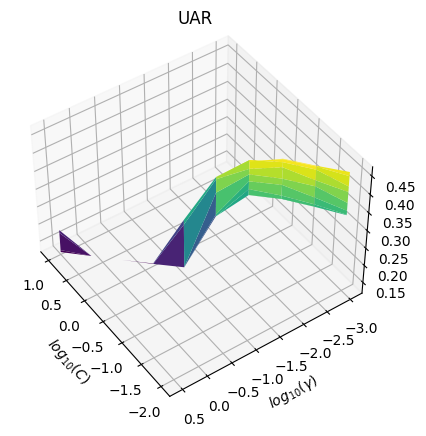

In [8]:
ax = plt.axes(projection='3d')
ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
ax.set_title('UAR')
ax.view_init(45, 145)

In [9]:
print(UAR_best)

0.46744791666666663


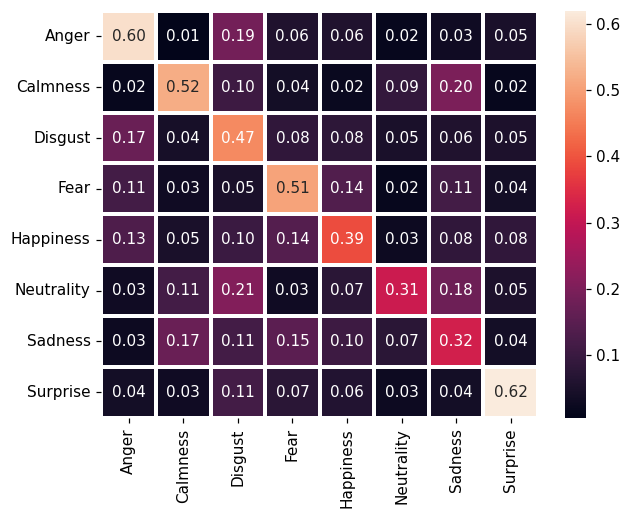

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [10]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)

# SVM (version 2)

In [11]:
C = [0.01, 0.05, 0.1, 1.0, 10, 100]
gamma = [100, 10, 1, 0.1, 0.01, 0.001]
UAR_list = []
UAR_best = 0
C_best, gamma_best = 0,0
for val_C in C:
    for val_gamma in gamma:
        model = SVC(kernel = 'rbf', C=val_C, gamma=val_gamma, decision_function_shape='ovr',break_ties=True)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best, gamma_best = val_C,val_gamma
            print(f'C = {val_C:.3f}, gamma = {val_gamma:.3f}')
        UAR_list.append(UAR)

 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.68it/s]

UAR = 0.125
C = 0.010, gamma = 100.000


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.51it/s]

UAR = 0.259
C = 0.010, gamma = 10.000


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.74it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.59it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.72it/s]

UAR = 0.365
C = 0.010, gamma = 0.010


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.13it/s]

UAR = 0.337


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.60it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.98it/s]

UAR = 0.259


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.44it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.38it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.77it/s]

UAR = 0.363


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.04it/s]

UAR = 0.337


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.51it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.28it/s]

UAR = 0.259


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.74it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.78it/s]

UAR = 0.127


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.01it/s]

UAR = 0.376
C = 0.100, gamma = 0.010


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.01it/s]

UAR = 0.339


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.55it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.47it/s]

UAR = 0.189


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.93it/s]

UAR = 0.125


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.79it/s]

UAR = 0.199


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 11.12it/s]

UAR = 0.447
C = 1.000, gamma = 0.010


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.73it/s]

UAR = 0.396


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.44it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.57it/s]

UAR = 0.189


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.31it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.92it/s]

UAR = 0.207


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.46it/s]

UAR = 0.456
C = 10.000, gamma = 0.010


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.89it/s]

UAR = 0.452


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.32it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.45it/s]

UAR = 0.189


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.95it/s]

UAR = 0.125


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.48it/s]

UAR = 0.207


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.40it/s]

UAR = 0.455


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.51it/s]

UAR = 0.441


In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [13]:
print(UAR_best)

0.45638020833333337


## Results and confusion matrix

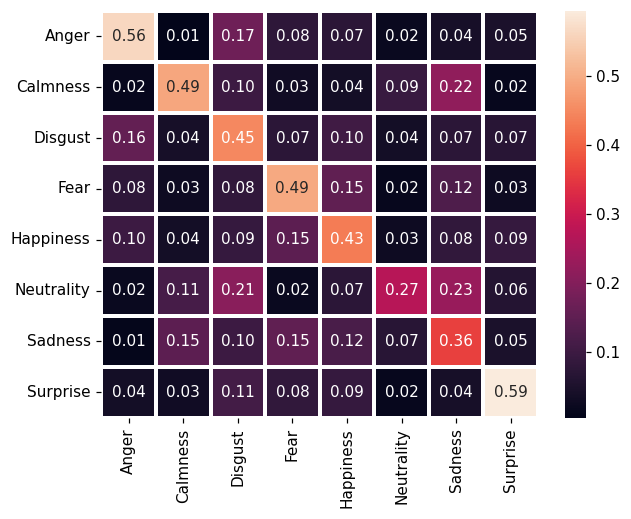

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [14]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)